# Code Alpha Internship Programm Task2 :Stock Prediction Using LSTM Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [3]:
# Load the dataset
df = pd.read_csv('google_stock.csv')

# Display the rows of the dataset

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218


missing values


In [ ]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [6]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

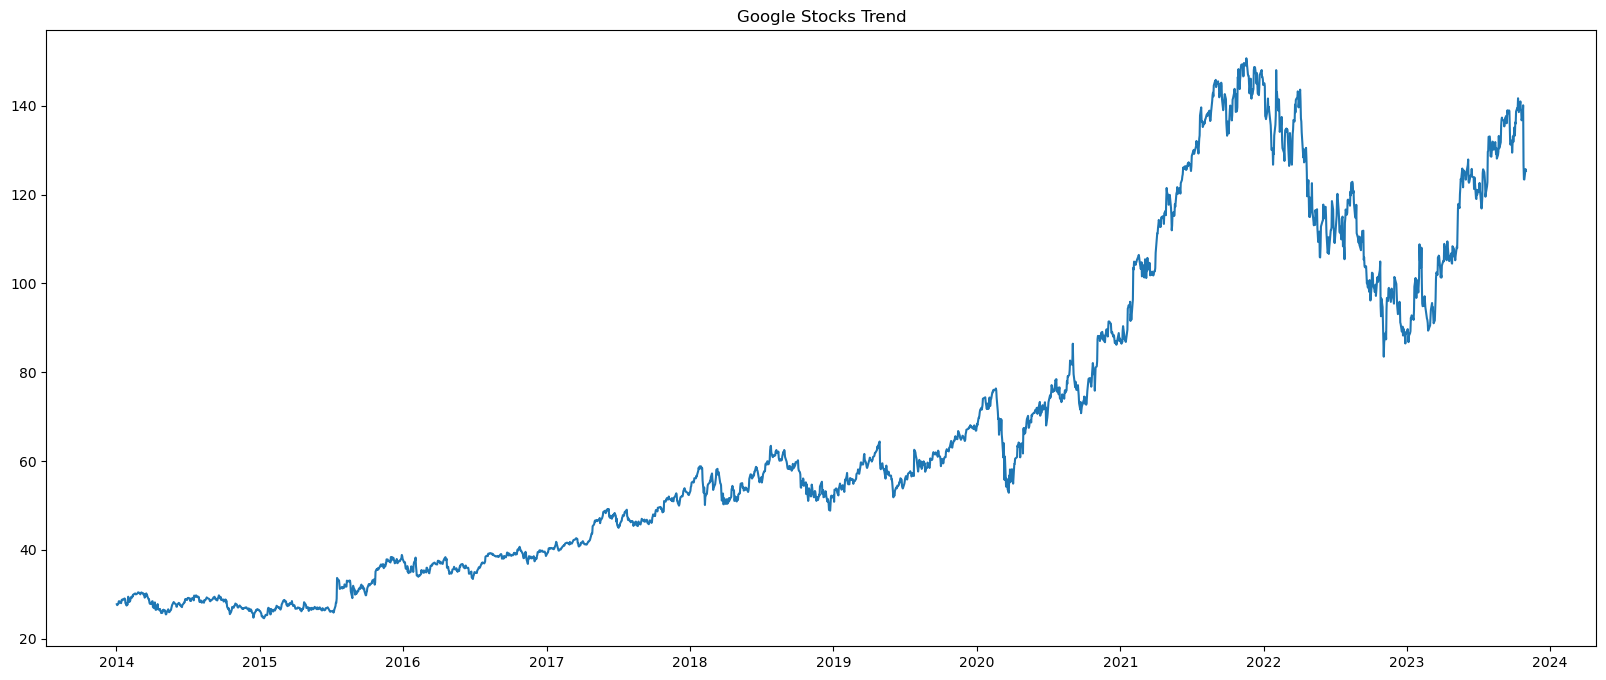

In [7]:
#plot the trend 
plt.figure(figsize=(20, 8))
plt.plot(df['Close'])
plt.title('Google Stocks Trend')
plt.show()

Feature Scaling

In [8]:
closing_prices = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

Training Dataset

In [11]:
seq_len = 60
X = []
y = []

for i in range(len(scaled_prices) - seq_len):
    X.append(scaled_prices[i : i + seq_len])
    y.append(scaled_prices[i + seq_len])

X = np.array(X)
y = np.array(y)

In [12]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size], X[train_size:len(X)]
train_y, test_y = y[0:train_size], y[train_size:len(y)]


In [14]:
# Reshape the data to 3D for LSTM [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [15]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



C:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_X, train_y, batch_size=1, epochs=1)



1932/1932 ━━━━━━━━━━━━━━━━━━━━ 106s 51ms/step - loss: 0.0045


In [17]:
# Predict the stock prices
predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)



16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step


In [22]:
# Adjust the validation set to match the predictions length
train = df[:train_size + seq_len]
valid = df[train_size + seq_len:].copy()
valid.loc[:, 'Predictions'] = predictions

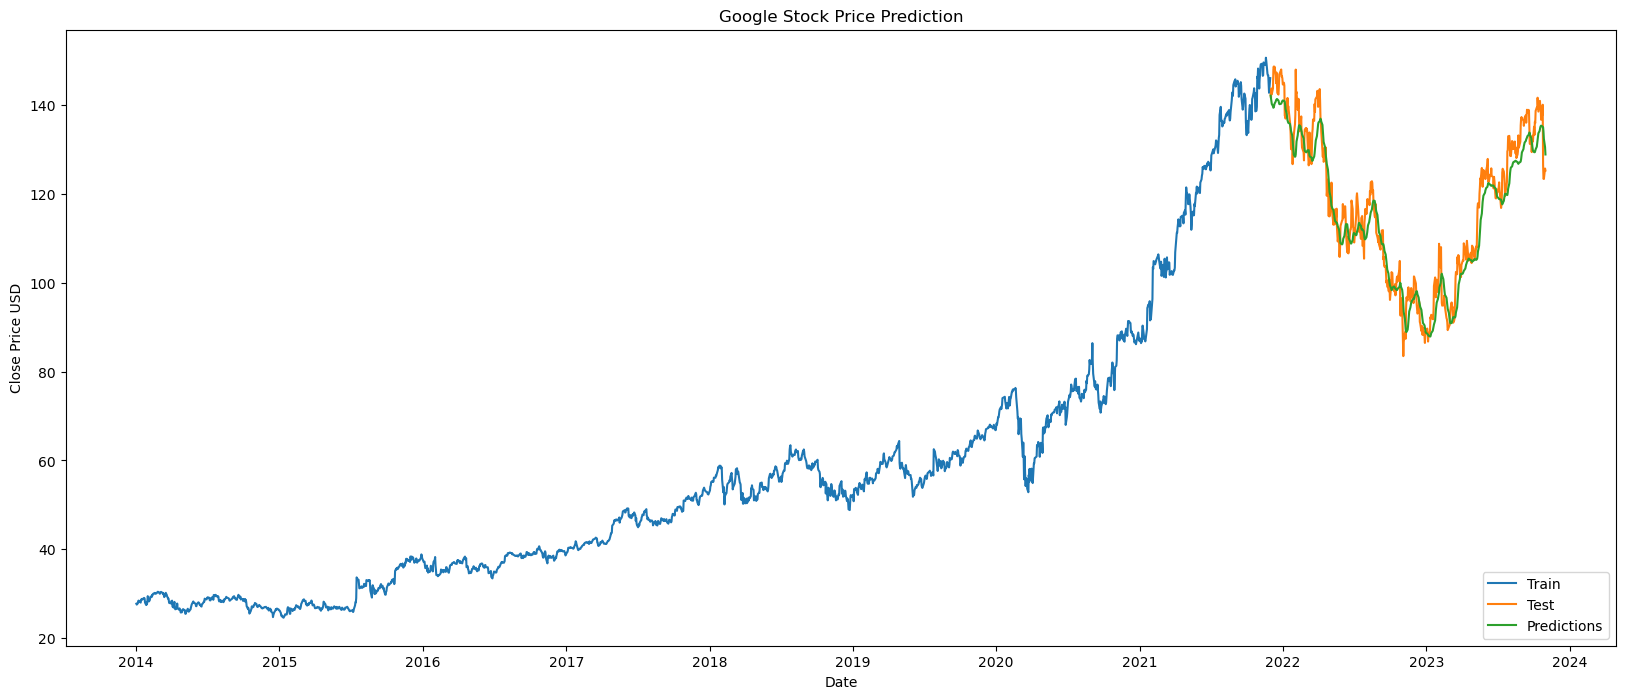

In [23]:
# Plot the results
plt.figure(figsize=(20, 8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()